# Assignment No 2 - Sean Healy

## 200016001

## https://github.com/SeanH0122/PY4SA23_Assignment

### Part 1: Python Basics

#### Task 1

In [3]:
# If... Else statement to test if a number is divisible by 3

# Prompt
num = int(input("Enter a number: "))

# Check
if num % 3 == 0:
    print(num, "is divisible by 3")
else:
    print(num, "is not divisible by 3")

Enter a number: 12
12 is divisible by 3


#### Task 2

In [6]:
# If... Else statement to test a string in a list

# Define
acceptable_fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]

# Prompt
fruit = input("Enter a fruit: ")

#Check
if fruit.lower() in acceptable_fruits:
    print(fruit.upper(), "is acceptable")
else:
    print(fruit.upper(), "is not acceptable.")

Enter a fruit: Banana
BANANA is not acceptable.


In [10]:
#Import
from math import radians, sin, cos, sqrt, atan2

#Define
def haversine_distance(coord1, coord2):
    #Mean radius of Earth in km
    R = 6371.0
    
    #Convert lat/long to radians
    lat1,lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])
    
    # Calculate the difference between the two latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the haversine of half the difference in latitude and longitude
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2

    # Calculate the central angle using the arctangent function
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    # Calculate the distance using the Haversine formula
    d = R * c

    return d

# Coordinates of Uni of St. Andrews
standrews = [56.3394, -2.7962]

#Coordinates of Edinburgh Uni
edinburgh = [55.9441, -3.1875]

#Calculate distance between Uni of St. Andrews and Edinburgh Uni with Haversine Function
distance = haversine_distance(standrews, edinburgh)

print(f"The distance between the Uni of St. Andrews and Edinburgh Uni is {distance: .2f} km.")

The distance between the Uni of St. Andrews and Edinburgh Uni is  50.20 km.


### Part 2: Pandas and NumPy

#### Question 1: How many trees are of the Quercus or Acer genus? 

In [46]:
import pandas as pandas

# Define file path 
portland_park_trees = '/Users/seanhealy/Desktop/PY4SA23_Assignment/Assignment_2_Data/portland_park_trees.csv'

# Read file
trees = pandas.read_csv(portland_park_trees)

# Filter for rows of Quercus or Acer genus
quercus_or_acer = trees[(trees['Genus'] == 'Quercus') | (trees['Genus'] == 'Acer')]

# Number of rows
num_trees = len(quercus_or_acer)

print(f"There are {num_trees} trees of the Quercus or Acer genus in the Portland parks.")

There are 5675 trees of the Quercus or Acer genus in the Portland parks.


#### Question 2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [25]:
# Filter for Quercus or Acer genus with DBH > 50 inches
quercus_or_acer_dbh_50 = quercus_or_acer[quercus_or_acer['DBH'] > 50]

# Number of rows
num_trees = len(quercus_or_acer_dbh_50)

print(f"There are {num_trees} trees of the Quercus or Acer genus with a DBH larger than 50 inches.")

There are 124 trees of the Quercus or Acer genus with a DBH larger than 50 inches.


#### Question 3:  Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [29]:
# Filter for Quercus, Acer, and Fraxinus genus
qaf_trees = trees[trees['Genus'].isin(['Quercus', 'Acer', 'Fraxinus'])]

# Calculate the mean DBH for each group
mean_dbh = qaf_trees.groupby('Genus')['DBH'].mean()

# Calculate the highest mean
highest_mean = mean_dbh.idxmax()

print(f"The genus with the highest mean DBH is {highest_mean}.")

The genus with the highest mean DBH is Quercus.


#### Question 4: How many different species of trees are recorded in the Acer genus? 

In [30]:
# Filter for Acer genus
acer_trees = trees[trees['Genus'] == 'Acer']

# Count unique species
num_species = len(acer_trees['Species'].unique())

print(f"There are {num_species} different species of trees in the Acer genus.")

There are 20 different species of trees in the Acer genus.


#### Question 5


In [36]:
# Define file path
world_cities = '/Users/seanhealy/Desktop/PY4SA23_Assignment/Assignment_2_Data/world_cities.csv'

# Read file
cities = pandas.read_csv(world_cities)

# New column that displays population in millions
cities['pop_M'] = cities['pop']/1000000

# Remove the original 'pop' column
del cities['pop']

# Filtering data to cities that being with 'S'
cities_s = cities.loc[cities['city'].str.startswith('S')]

# Selecting a city that begins with 'S'
my_city = cities_s.iloc[2]['city']
print(my_city)

Sa Kaeo


In [45]:
# Find the country where Sa Kaeo is located
country = cities.loc[cities['city'] == 'Sa Kaeo', 'country'].iloc[0]

# Subset the cities in that country
cities_in_country = cities.loc[cities['country'] == country]

# Sort the cities by population size
largest_cities = cities_in_country.sort_values('pop_M', ascending = False)[:5]

print(largest_cities)

               city   country    lat     lon  capital     pop_M
3225        Bangkok  Thailand  13.73  100.50        1  4.935988
26259    Nonthaburi  Thailand  13.80  100.18        0  0.391245
32665  Samut Prakan  Thailand  13.61  100.61        0  0.390744
39376    Udon Thani  Thailand  17.41  102.79        0  0.251672
7585      Chon Buri  Thailand  13.40  101.00        0  0.224441


### Part 3: Python Data Visualisation

#### Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis

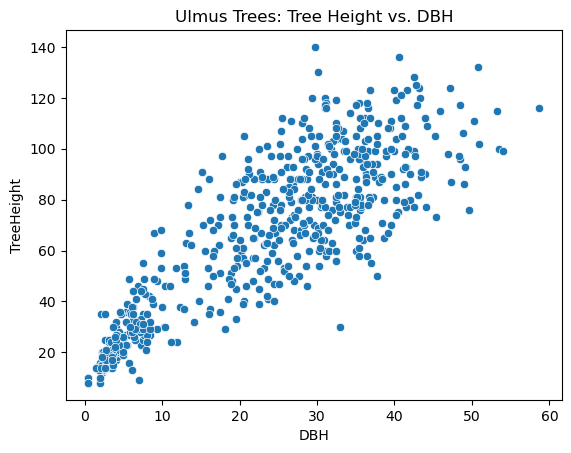

In [129]:
import matplotlib.pyplot as pyplot

# Filter the data for trees in the Ulmus genus
ulmus_trees = trees[trees['Genus'] == 'Ulmus']

# Plotting the data 
seaborn.scatterplot(data = ulmus_trees, x = 'DBH', y = 'TreeHeight')
pyplot.title('Ulmus Trees: Tree Height vs. DBH')
pyplot.show()

#### Graph 2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue

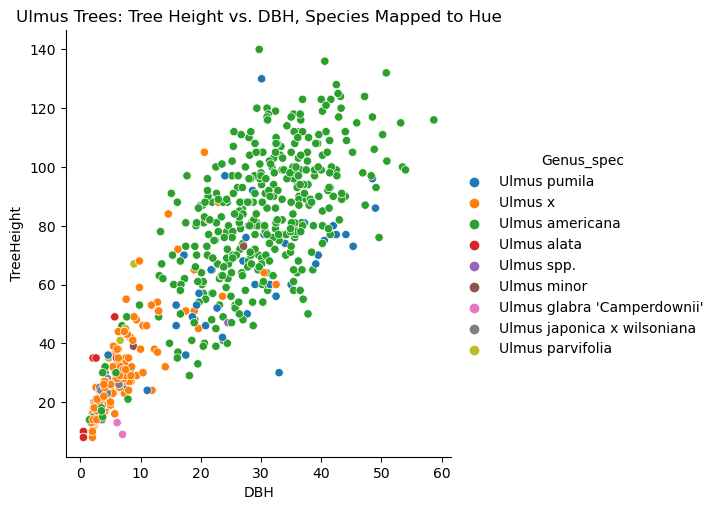

In [128]:
import seaborn as seaborn

# Plotting the data
ulmus_hue = seaborn.relplot(x = "DBH", y = "TreeHeight", hue = "Genus_spec", data = ulmus_trees)
pyplot.title('Ulmus Trees: Tree Height vs. DBH, Species Mapped to Hue')
pyplot.show()

#### Graph 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species

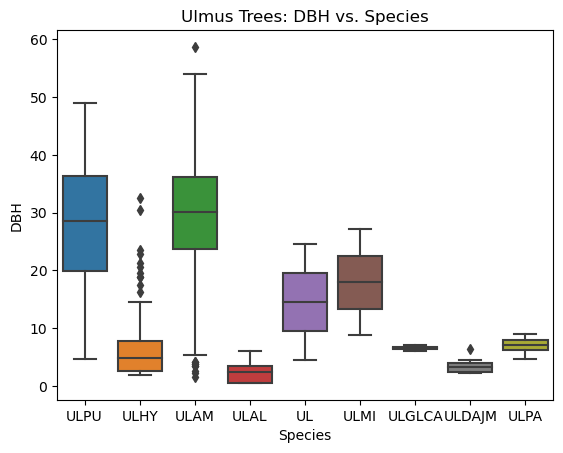

In [127]:
# Plotting the data - 'Species' used instead of 'Genus_spec' for x axis clarity
ulmus_species = seaborn.boxplot(data = ulmus_trees, x = 'Species', y = 'DBH')
pyplot.title('Ulmus Trees: DBH vs. Species')
pyplot.show()

#### Graph 4: Combine Graphs 1 and 3 into a single figure. 

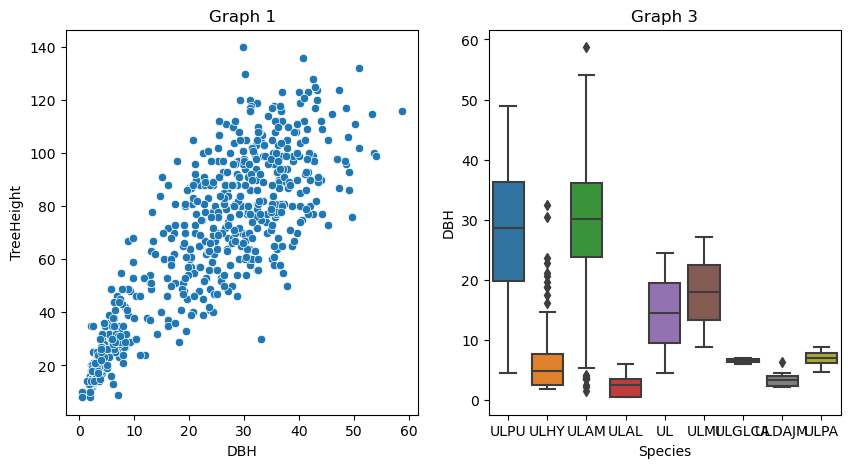

In [110]:
# Set up figure and gridspec
graph4 = pyplot.figure(figsize = (10, 5))
gridspec = fig.add_gridspec(1, 2)

# Add scatter plot to first subplot
ax1 = graph4.add_subplot(gridspec[0, 0])
seaborn.scatterplot(data = ulmus_trees, x = 'DBH', y = 'TreeHeight', ax = ax1)
ax1.set_title('Graph 1')

# Add box plot to second subplot
ax2 = graph4.add_subplot(gridspec[0, 1])
seaborn.boxplot(data = ulmus_trees, x = 'Species', y = 'DBH', ax = ax2)
ax2.set_title('Graph 3')

# Show the figure
pyplot.show()